## Predicting Experience of Players on a Video Game Research Server
### DSCI Final Project Report 
**Project 009-35**

Group Members: Audryleine Isidro(70928791), Jiatong Liu(), Daniel Yu(35790732), Daniel Chan(17965385)

### **Introduction** 
It is important to understand how different players engage with a video game research server to manage resources and plan effective recruitment strategies. 

A research group in Computer Science at UBC, led by Frank Wood, gathers detailed gameplay information from a custom Minecraft server. Because maintaining this project demands substantial resources, the team must identify which players are most likely to produce large amounts of data. Doing so helps them focus their recruitment efforts on players who will provide the most useful and impactful contributions.

In this project, we focus on determining which "kinds" of players are most likely to contribute a large amount of data so that recruitment efforts can be better targeted. Specifically, we explore **whether a player’s experience level in Minecraft can be predicted using their age and total played hours**. We selected this focus because recruiters who aim to maximize gameplay data, such as total hours played, may benefit from understanding how these characteristics relate to experience. Our findings can help identify which types of players should be prioritized if the goal is to target particular age groups or players with the potential to generate more extensive gameplay data. Overall, we aim to determine whether measurable player characteristics are associated with being more experienced, which may indicate a higher likelihood of contributing large data.

Our intended information source is the `Players` data set 

Number of observed rows: `196`
Number of observed columns: `7`

Columns in the dataset:
- `experience` - The experience level of each player who plays Minecraft (Beginner, Amateur, Pro, Regular and Veteran)
- `subscribe` - Whether the player subscribed to a game-related newsletter or communications. (True or False)
- `hashedEmail` - An anonymous player ID
- `played_hours` - Total number of hours the player has spent playing the game
- `name` - The player's display name
- `gender` The player's reported gender
- `age` The player's age in years

### **Method and Results**

This section outlines the methods we used to investigate whether a player’s age and total played hours can predict their experience level.

In [1]:
# imperative packages need to be loaded
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# load data
url<-"https://raw.githubusercontent.com/audryleine-isidro/dsci-final-project/refs/heads/main/players.csv"
players<-read_csv(url)

# inspect the structure of the data
glimpse(players)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
# wrangle and clean data

# select the relevant variables, convert experience to a factor type, and remove rows containing missing value
players<-players|>
    select (experience,played_hours,Age)|>
    mutate(experience = as_factor(experience))|>
    drop_na()

players

experience,played_hours,Age
<fct>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
⋮,⋮,⋮
Veteran,0.3,22
Amateur,0.0,57
Amateur,2.3,17


#### **Summary of Dataset**

In [4]:
#summary of dataset
players_summary <- players |>
                    group_by(experience) |>
                    summarize(mean_age = mean(Age),
                             mean_hours = mean(played_hours),
                             med_age = median(Age),
                             med_hours = median(played_hours))
players_summary                    

experience,mean_age,mean_hours,med_age,med_hours
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Pro,16.92308,2.7846154,17,0.4
Veteran,20.95833,0.6479167,20,0.1
Amateur,21.36508,6.0174603,20,0.1
Regular,22.02857,18.7257143,20,0.1
Beginner,21.65714,1.2485714,20,0.1


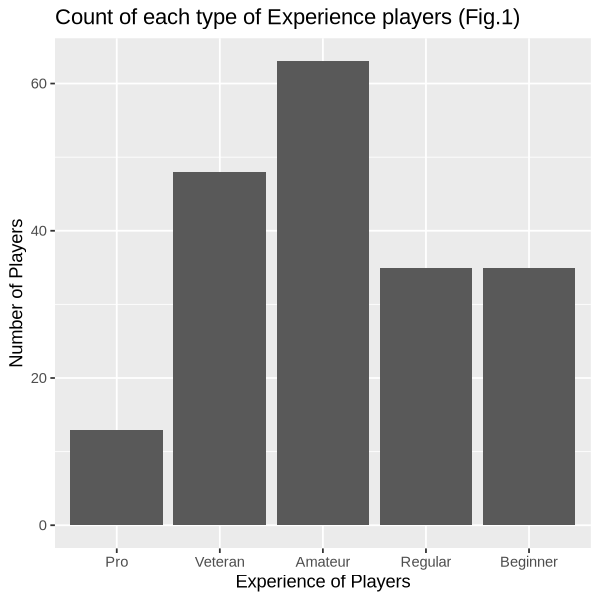

In [5]:
# visualization
options(repr.plot.width = 5, repr.plot.height = 5)
players_viz <- players |>
                ggplot(aes(x = experience)) +
                geom_bar() +
                labs(x = "Experience of Players", y = "Number of Players", title = "Count of each type of Experience players (Fig.1)")
                
players_viz

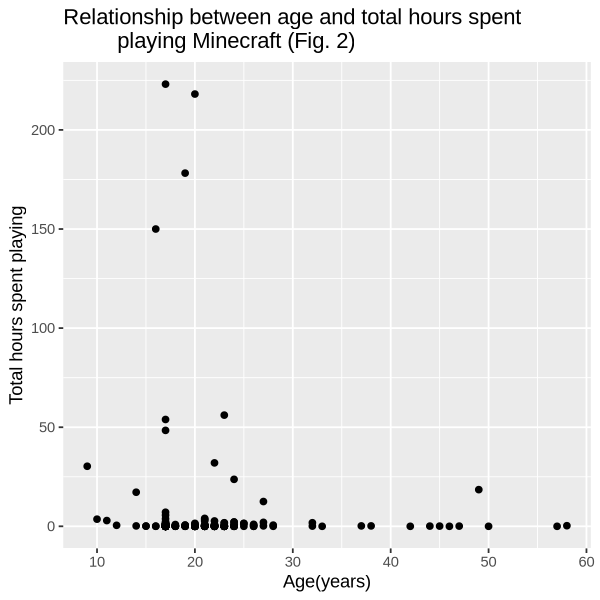

In [6]:
# scatterplot to display the relationship between age of the players and the total hours spent playing Minecraft

players_plot<-players|>
    ggplot(aes(x=Age, y=played_hours))+
    geom_point()+
    labs(title="Relationship between age and total hours spent 
         playing Minecraft (Fig. 2)",
         x="Age(years)",
         y="Total hours spent playing")
players_plot

#### **Data Analysis**

#### K-NN Classifier
In order to discover whether players' age and total played hours can be the predictor for players' experience in the game, we are going to apply K-Nearest Neighbours (K-NN) algorithm. One of the main reasons is that we aim to predict catagorical values, thus it's a classification problem. The K-NN algorithm makes us to predict the target variable without a constant regression line.

#### Accuracy of Classifier
To apply K-Nearest Neighbours, it is important to make sure the accuracy of our classifier. Thus, we need to split our data into training sets and test sets. In this research we are going to split 80% of the data into training sets and 20% into test sets. After we've splitted our dataset we can process our data.

In [7]:
#data splitting
players_split <- initial_split(players, prop = 0.8, strata = experience)
training_players <- training(players_split)
testing_players <- testing(players_split)

In [8]:
set.seed(1234)
#creating recipe and k-nn model
players_recipe <- recipe(experience ~., data = players) |>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors())
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit <- workflow() |>
            add_recipe(players_recipe) |>
            add_model(knn_spec) |>
            fit(data = training_players)

#predict the validation data
validation_predicted <- predict(knn_fit, testing_players) |>
                        bind_cols(testing_players)

#computer accuracy
acc <- validation_predicted |>
        metrics(truth = experience, estimate=.pred_class) |>
        filter(.metric == "accuracy") |>
        select(.estimate) |>
        pull()
acc

#confusion matrix
players_mat <- validation_predicted |> 
      conf_mat(truth = experience, estimate = .pred_class)
players_mat

[1] 0.2682927

          Truth
Prediction Pro Veteran Amateur Regular Beginner
  Pro        1       0       1       1        0
  Veteran    1       1       1       1        2
  Amateur    0       7       8       4        6
  Regular    0       2       1       1        0
  Beginner   0       1       2       0        0

In [9]:
set.seed(1234)
#cross validation
players_vfold <- vfold_cv(training_players, v = 5, strata = experience)


#players_resample_fit <- workflow() |>
#      add_recipe(players_recipe) |>
#      add_model(knn_spec) |>
#      fit_resamples(resamples = players_vfold) |>
#      collect_metrics(na_rm = TRUE)
#players_resample_fit

#tuning the classifier
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

#knn_fit <- workflow() |>
#            add_recipe(players_recipe) |>
#            add_model(knn_spec) |>
#            fit(data = training_players)

#knn_tune

#get results
k_vals <- tibble(neighbors = seq(from = 1, to = 5, by = 1))

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.2332824,5,0.04768574,Preprocessor1_Model1
2,accuracy,multiclass,0.2152072,5,0.02993138,Preprocessor1_Model2
3,accuracy,multiclass,0.2550218,5,0.03008950,Preprocessor1_Model3
4,accuracy,multiclass,0.2546334,5,0.01736953,Preprocessor1_Model4
5,accuracy,multiclass,0.2479519,5,0.01800577,Preprocessor1_Model5


[1] 3

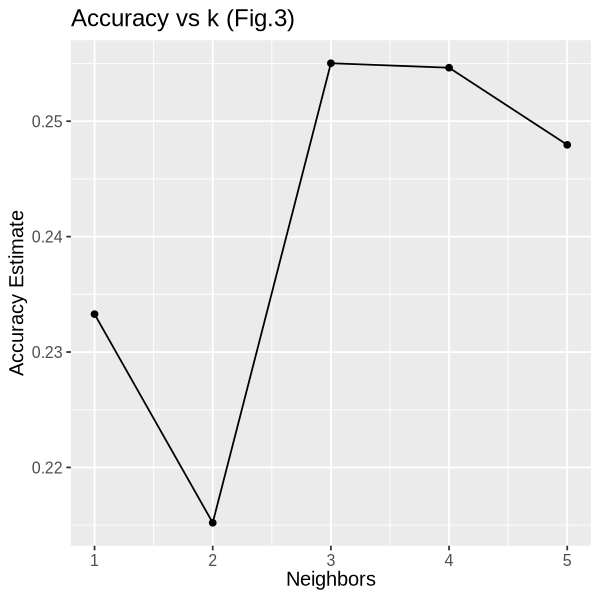

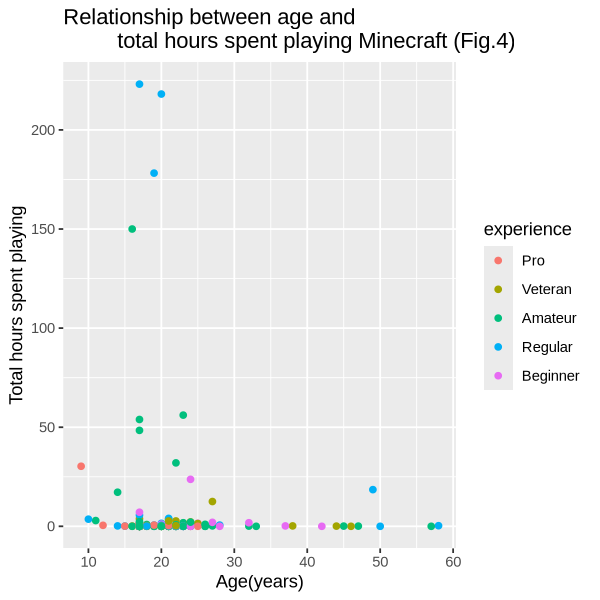

In [10]:
# visualization of data anaylsis 

#accuracy vs k 
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracy vs k (Fig.3)") +
  theme(text = element_text(size = 12))

accuracy_vs_k

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

#plot of age and played hours with experience coloured.
players_plot_coloured<-players|>
    ggplot(aes(x=Age, y=played_hours))+
    geom_point(aes(colour = experience))+
    labs(title="Relationship between age and 
         total hours spent playing Minecraft (Fig.4)",
         x="Age(years)",
         y="Total hours spent playing")
players_plot_coloured
               

### **Discussion**

The visualizations created in our analysis provided valuable insight into the relationship between age, total played hours, and a player’s experience level on the Minecraft research server.

*Figure 1* showed an important limitation in our data. The experience levels Regular, Beginner, and Amateur make up most of the dataset, while Pro players are very rare.  We treated this not as missing data but as a meaningful pattern, suggesting that Pro players may genuinely be harder to find and recruit. Because of this, we kept all five experience categories instead of combining them into broader groups (Novice, Intermediate and Advanced). This choice allowed us to better reflect the real challenge of identifying highly experienced players. However, this imbalance directly affected our K-NN model. In the confusion matrix, “Amateur” was predicted 21 times across all true labels, while “Pro” was never predicted. With so few Pro examples, the model had almost no opportunity to learn their characteristics and defaulted to predicting majority classes. Since K-NN depends on the structure of nearby points, this imbalance was a major factor contributing to the low accuracy of our classifier.

*Figures 2 and 3* showed that there is no clear relationship between age and total played hours. While a few players aged 10–20 recorded higher hours, most players, regardless of age, seem to cluster at low hours. This suggests that age is not a meaningul predictor of experience, and played hours only very weakly relates to it. *Figure 3* reinforces this by showing heavy overlap among all five experience group levels, with no distinct boundaries separating them. Because K-NN relies on clear separation among neighbouring points, this lack of structure makes accurate classification very difficult.

These visual patterns help explain why our K-NN classifier performed poorly, with an accuracy of only **0.20**(20%), which is low for a five-class problem. Our tuning results further supports this. When we tested k values from 1 to 5, the accuracies ranged only from ~0.27 to ~0.30, with **k = 4** performing slightly better at 0.3029606. The consistently low accuracy across all k values shows that age and total played hours do not contain enough information to classify experience levels effectively. The fluctuations in accuracy as k changes also indicate that the model is unstable with these predictors.

Overall, these findings were not surprising. Total played hours showed only a very weak, and inconsistent relationship with experience level, and age showed almost no meaningful pattern at all. Since our results show that neither age nor total hours can clearly separate the experience groups, it suggests that these two variables alone do not capture the factors that truly determine a player’s experience level. Despite the model's poor performance, the analysis still provides useful insights. The summary statistics show that some experience groups, such as Regular and Amateur players, tend to have higher total playtime, meaning they may contribute more gaming data overall. However, scatterplots and low K-NN accuracy confirm that age and hours can’t reliably classify experience and thus, recruitment should not rely solely on these variables. Future work could consider session details (start/end times, activities like building or socializing) or a player's social media presence. A more representative dataset with more Pro players might reveal clearer patterns and improve predictions.

These findings also lead to several future questions, including which other variables best predict the experience level? Would including more Pro players in the data change outcomes? And are simple models like K-NN sufficient, or should more advanced methods be used? Investigating these questions may help guide researchers in collecting data in the future and support more effective recruitment strategies


### **Repository**

The link to our repository: https://github.com/audryleine-isidro/dsci-final-project.git